### Steel Plates Faults Dataset

In [95]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

#Importing Steel Plates Faults Dataset
dataset = pd.read_csv('C:/Users/Manan/Desktop/Fall 2019/Machine Learning COMP6321/Project/Machine-Learning-Project/classification-models/Steel Plates Faults/data/Faults.NNA',sep='\t')
data = pd.DataFrame(dataset)
print(data)
X = data.iloc[:, 0:27].values
Y = data.iloc[:, 27:34].values

        42    50   270900   270944   267  17   44   24220   76  108  ...  \
0      645   651  2538079  2538108   108  10   30   11397   84  123  ...   
1      829   835  1553913  1553931    71   8   19    7972   99  125  ...   
2      853   860   369370   369415   176  13   45   18996   99  126  ...   
3     1289  1306   498078   498335  2409  60  260  246930   37  126  ...   
4      430   441   100250   100337   630  20   87   62357   64  127  ...   
...    ...   ...      ...      ...   ...  ..  ...     ...  ...  ...  ...   
1935   249   277   325780   325796   273  54   22   35033  119  141  ...   
1936   144   175   340581   340598   287  44   24   34599  112  133  ...   
1937   145   174   386779   386794   292  40   22   37572  120  140  ...   
1938   137   170   422497   422528   419  97   47   52715  117  140  ...   
1939  1261  1281    87951    87967   103  26   22   11682  101  133  ...   

      0.8182  -0.2913  0.5822  1.3  0.1  0.2  0.3  0.4  0.5  0.6  
0     0.7931  -0.175

In [89]:
# INVERSE OF ONE HOT ENCODING
# Converting Y to single one column matrix
y = []
for i in range(Y.shape[0]):
    if Y[i,0] == 1:
        y.append("Pastry")
    elif Y[i,1] == 1:
        y.append("Z_Scratch")
    elif Y[i,2] == 1:
        y.append("K_Scatch")
    elif Y[i,3] == 1:
        y.append("Stains")
    elif Y[i,4] == 1:
        y.append("Dirtiness")
    elif Y[i,5] == 1:
        y.append("Bumps")
    else:
        y.append("Other_Faults")
        
y=np.array(y)
faults = pd.DataFrame({'faults':y})

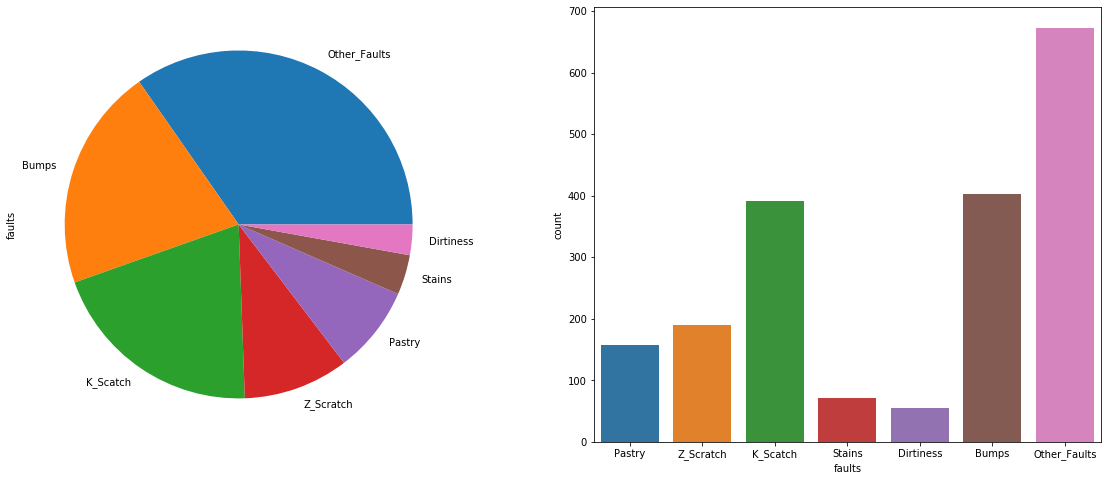

In [90]:
fig, ax=plt.subplots(1,2,figsize=(20,8))

faults['faults'].value_counts().plot.pie(ax=ax[0])
sns.countplot(x='faults', data=faults, ax=ax[1])

In [91]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_encoded = sc.fit_transform(X)

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, y, test_size = 0.33, random_state = 0)

In [93]:
# Model Accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

names = ['KNeighborsClassifier', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier','AdaBoostClassifier','LogisticRegression','GaussianNB']
models = [KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
          SVC(kernel = 'linear', random_state = 0),
          DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
          RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0),
          AdaBoostClassifier(n_estimators=10,learning_rate=1),
          LogisticRegression(random_state = 0,solver='lbfgs',multi_class='ovr'),
          GaussianNB()]

accuracy= np.zeros(7)

for counter, model in enumerate(models):
    model.fit(X_train, Y_train)
    Y_pred=model.predict(X_test)
    accuracy[counter] = sklearn.metrics.accuracy_score(Y_test, Y_pred)*100
    print("Accuracy for " + names[counter] + ":",accuracy[counter])


Accuracy for KNeighborsClassifier: 74.72698907956318
Accuracy for SVC: 75.19500780031201
Accuracy for DecisionTreeClassifier: 74.57098283931357
Accuracy for RandomForestClassifier: 74.41497659906396
Accuracy for AdaBoostClassifier: 53.82215288611545
Accuracy for LogisticRegression: 74.88299531981279
Accuracy for GaussianNB: 61.77847113884556


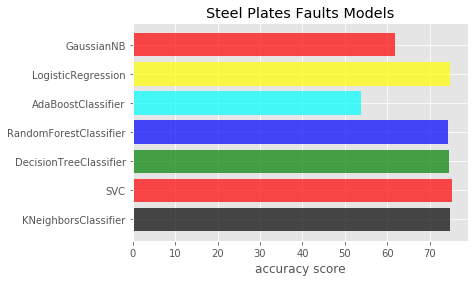

In [113]:
#Comparision graph between all models
%matplotlib inline
plt.style.use('ggplot')

colors = ['black', 'red', 'green', 'blue', 'cyan','yellow','red']
y_pos = np.arange(len(names))
heights = [accuracy[0],accuracy[1],accuracy[2],accuracy[3],accuracy[4],accuracy[5],accuracy[6]]

plt.barh(y_pos, heights,color=colors, align='center', alpha=0.7)
plt.yticks(y_pos, names)
plt.xlabel('accuracy score')
plt.title('Steel Plates Faults Models')
plt.show()